In [40]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

%matplotlib inline

In [41]:
model = YOLO("yolov8l.pt")

In [42]:
imagePath = '../images/6.jpeg'

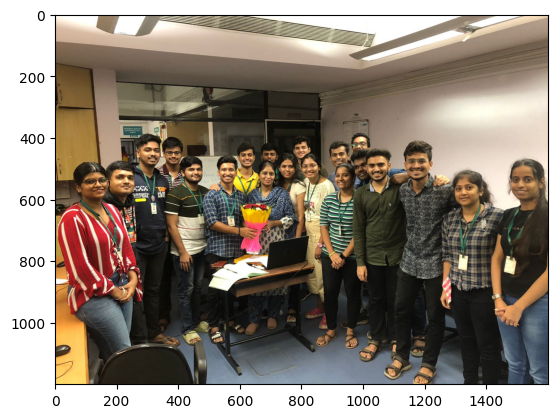

In [43]:
img = cv2.imread(imagePath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [44]:
results = model(img)


0: 480x640 17 persons, 1 chair, 1 laptop, 1 remote, 2038.4ms
Speed: 40.6ms preprocess, 2038.4ms inference, 25.0ms postprocess per image at shape (1, 3, 480, 640)


In [45]:
type(results[0].names)

dict

In [46]:
results[0].names[0],results[0].path

('person', 'image0.jpg')

In [47]:
results[0].boxes.xyxy.shape

torch.Size([20, 4])

In [48]:
def draw_box(img, result, class_list) :
    xyxy= result.boxes.xyxy.numpy()
    confidence= result.boxes.conf.numpy()
    class_id= result.boxes.cls.numpy().astype(int)
    class_name = [class_list[x] for x in class_id]
    sum_output = list(zip(class_name, confidence,xyxy))
    out_image = img.copy()
    person_count = 0
    for run_output in sum_output :
        # Unpack
        label, con, box = run_output
        # Choose color
        box_color = (0, 0, 255)
        text_color = (255,255,255)
        # Draw object box
        first_half_box = (int(box[0]),int(box[1]))
        second_half_box = (int(box[2]),int(box[3]))
        cv2.rectangle(out_image, first_half_box, second_half_box, box_color, 2)
        # Create text
        text_print = '{label} {con:.2f}'.format(label = label, con = con)
        if label == 'person' :
            person_count += 1
        # Locate text position
        text_location = (int(box[0]), int(box[1] - 10 ))
        # Get size and baseline
        labelSize, baseLine = cv2.getTextSize(text_print, cv2.FONT_HERSHEY_SIMPLEX, 1, 2) 
        # Draw text's background
        cv2.rectangle(out_image 
                        , (int(box[0]), int(box[1] - labelSize[1] - 10 ))
                        , (int(box[0])+labelSize[0], int(box[1] + baseLine-10))
                        , box_color , cv2.FILLED) 
        # Put text
        cv2.putText(out_image, text_print ,text_location
                    , cv2.FONT_HERSHEY_SIMPLEX , 1
                    , text_color, 2 ,cv2.LINE_AA)
    return out_image,person_count


In [49]:
ou_img,count = draw_box(img, results[0], results[0].names)

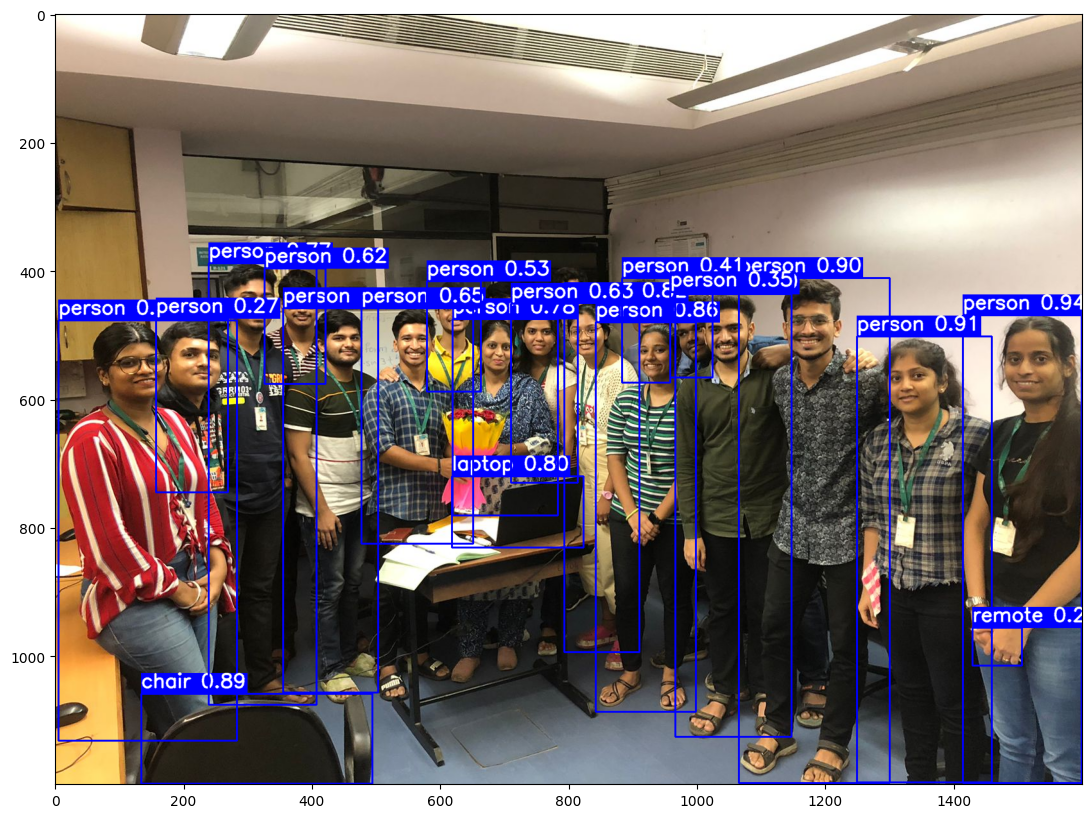

In [50]:
plt.figure(figsize=(20,10))
plt.imshow(ou_img)
plt.show()

In [51]:
count

17

In [52]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [53]:
face = face_classifier.detectMultiScale(
    img, scaleFactor=1.1, minNeighbors=5
)

In [54]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

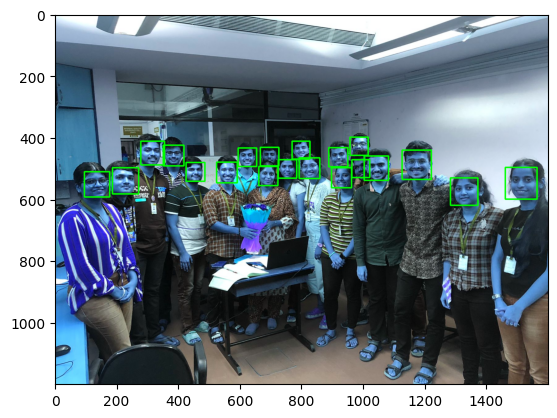

In [55]:
# plot image

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

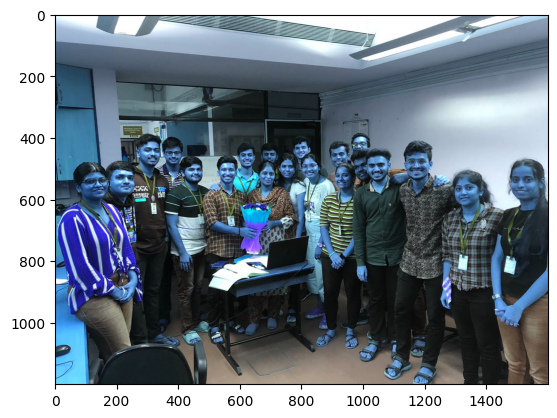

In [56]:
img = cv2.imread(imagePath)
img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

plt.imshow(img)
plt.show()